In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU available: []


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

def download_dataset():
    """Download the flower dataset"""
    print("Downloading flower dataset...")
    dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
    data_dir = Path(data_dir)
    print(f"Dataset downloaded to: {data_dir}")
    return data_dir

def explore_dataset(data_dir):
    """Explore the dataset structure"""
    print("\nDataset structure:")
    image_files = []
    for item in data_dir.iterdir():
        if item.is_dir() and item.name != 'LICENSE.txt':
            count = len(list(item.glob('*.jpg')))
            print(f"{item.name}: {count} images")
            image_files.extend(list(item.glob('*.jpg')))

    return image_files

# Run data preparation
if __name__ == "__main__":
    data_dir = download_dataset()
    image_files = explore_dataset(data_dir)
    print(f"\nTotal images: {len(image_files)}")

Dataset downloaded to: /root/.keras/datasets/flower_photos

Dataset structure:
flower_photos: 0 images

Total images: 0


In [3]:
import tensorflow as tf

def create_datasets(data_dir, img_height=224, img_width=224, batch_size=32):
    """Create training and validation datasets"""

    # Training dataset
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    # Validation dataset
    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    class_names = train_ds.class_names
    print(f"Classes found: {class_names}")

    return train_ds, val_ds, class_names

def optimize_datasets(train_ds, val_ds):
    """Optimize dataset performance"""
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    return train_ds, val_ds

In [5]:
import tensorflow as tf
from tensorflow import keras

def setup_training(model, learning_rate=0.001):
    """Configure model compilation and callbacks"""

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Setup callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-6,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            'models/best_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    return callbacks

def train_model(model, train_ds, val_ds, epochs=15):
    """Train the model"""

    callbacks = setup_training(model)

    print("Starting training...")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return history

=== Starting Edge AI Model Training ===
Dataset downloaded to: /root/.keras/datasets/flower_photos
Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.
Classes found: ['flower_photos']

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 28, 28, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,369 (634.25 KB)

 Trainable params: 161,409 (630.50 KB)

 Non-trainable params: 960 (3.75 KB)


Total parameters: 162,369
Estimated model size: 0.62 MB
Starting training...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to models/best_model.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 636s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.00000
92/92 ━━━━━━━━━━━━━━━━━━━━ 605s 7s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00000
92/92 ━━━━━━━━━━━━━━━━━━━━ 581s 6s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: val_accuracy did not improve from 0.00000
92/92 ━━━━━━━━━━━━━━━━━━━━ 6

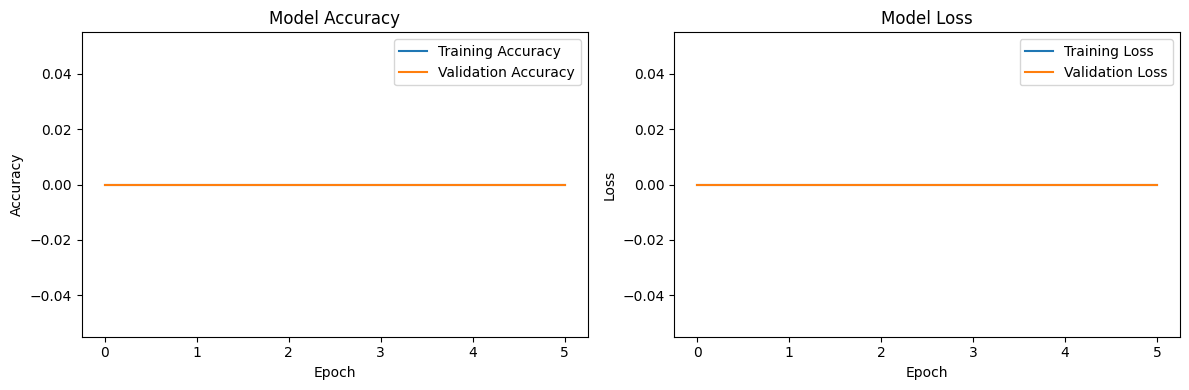

Training completed! Model saved.


In [7]:
import matplotlib.pyplot as plt
# from data_preparation import download_dataset
# from data_loaders import create_datasets, optimize_datasets
# from model_architecture import create_lightweight_model, print_model_summary
# from training_config import train_model
import os

def plot_training_history(history):
    """Plot training history"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    # Create the results directory if it doesn't exist
    if not os.path.exists('results'):
        os.makedirs('results')
    plt.savefig('results/training_history.png')
    plt.show()

def main():
    """Main training execution"""
    print("=== Starting Edge AI Model Training ===")

    data_dir = download_dataset()
    train_ds, val_ds, class_names = create_datasets(data_dir)
    train_ds, val_ds = optimize_datasets(train_ds, val_ds)

    model = create_lightweight_model(len(class_names))
    print_model_summary(model)

    history = train_model(model, train_ds, val_ds, epochs=15)

    plot_training_history(history)

    model.save('models/flower_classifier_keras.h5')
    print("Training completed! Model saved.")

    return model, class_names

if __name__ == "__main__":
    model, class_names = main()